In [5]:
#考虑做个flag特征，判断title是否在query_prediction里面，因为title是否出现在query_prediction里面对点击率有明显的影响
#明天任务，考虑title与query_prediction中的距离（字符串长度差）----------------好好想想，脑壳有点炸    9/27

import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
train_data = pd.read_table('E:/competionfile/oppo/oppo_round1_train_20180926/oppo_round1_train_20180926.txt')
# train_data.head(100)

In [6]:
train_data.columns = ['prefix','query_prediction','title','tag','label']
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999999 entries, 0 to 1999998
Data columns (total 5 columns):
prefix              object
query_prediction    object
title               object
tag                 object
label               int64
dtypes: int64(1), object(4)
memory usage: 76.3+ MB


In [3]:
#查看文章内容标签 tag
train_data['tag'].unique()
train_data['tag'].value_counts().index
    

Index(['百科', '应用', '网站', '知道', '健康', '经验', '菜谱', '音乐', '阅读', '影视', '汽车', '快应用',
       '歌手', '游戏', '旅游', '景点', '商品', '网页', '火车', '酒店', '航班', '推广'],
      dtype='object')

In [4]:
#查看样本的点击率情况
print('总体样本点击率:',train_data['label'].mean())
print('query_prediction不为空的点击率：',train_data[train_data['query_prediction'].notnull()]['label'].mean())
print('query_prediction为空的点击率:',0.26768763188253597)

总体样本点击率: 0.3747341873670937
query_prediction不为空的点击率： 0.3744794933234017
query_prediction为空的点击率: 0.26768763188253597


In [5]:
#查看文章内容标签得点击率 tag 
train_data.groupby(['tag'])['label'].mean().sort_values(ascending = False)

tag
火车     0.646447
汽车     0.523542
网站     0.501509
经验     0.475743
游戏     0.431479
菜谱     0.413829
百科     0.411762
景点     0.392668
影视     0.386617
应用     0.346415
健康     0.298414
航班     0.277411
音乐     0.255796
阅读     0.250989
快应用    0.244028
知道     0.243414
酒店     0.214932
旅游     0.149773
商品     0.147981
网页     0.144444
歌手     0.092597
推广     0.000000
Name: label, dtype: float64

In [6]:
#可视化
from matplotlib import pylab as plt 
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
train_data.groupby(['tag'])['label'].mean().plot.bar(title = '文章类型点击率')
plt.show()

<Figure size 640x480 with 1 Axes>

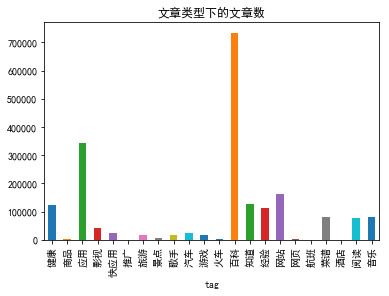

In [7]:
#tag下的title数,
from matplotlib import pylab as plt 
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
train_data.groupby(['tag'])['title'].count().plot.bar(title='文章类型下的文章数')
plt.show()

In [8]:
#查看文章标题的点击率 title_ctr
train_data.groupby(['title'])['label'].mean().sort_values(ascending = False)

title
突尼斯                                                1.0
流产后不能吃什么?                                          1.0
土牛膝根能治疗幼儿腹泻吗                                       1.0
中国工商银行app 手机号换了 想登陆的时候会把短信发到原来的手机号 但又注册不了新的 怎么办    1.0
色盲测试图                                              1.0
流产后吃什么对子宫好                                         1.0
录井仪器原理                                             1.0
流产后可以吃什么水果                                         1.0
色系军团                                               1.0
流产后饮食                                              1.0
土牛七                                                1.0
凯旋王国主题游乐园                                          1.0
小爱音箱                                               1.0
土炕                                                 1.0
流产吃什么药                                             1.0
中国嵩山少林寺                                            1.0
流产后有什么注意事项                                         1.0
色甘酸钠                                               1.0
中国山东

In [8]:
#查看文章标题的点击次数 title_count
#计算点击小于1的title个数  特征处理的时候可以归为其他类
train_data.groupby(['title'])['label'].count()#未完成

257718

In [10]:
#查看query_prediction的情况
train_data['query_prediction'].unique().shape[0]

161443

In [11]:
#查看query_prediction的点击率
train_data.groupby(['query_prediction'])['label'].mean().sort_values()

query_prediction
{"晚上敷面膜后要洗脸吗": "0.257", "晚上敷面膜": "0.033", "晚上敷面膜个性说说": "0.033", "晚上敷面膜要洗吗": "0.016", "晚上敷面膜最佳时间": "0.017", "晚上敷面膜的正确步骤": "0.035", "晚上敷面膜的最佳时间": "0.445", "晚上敷面膜好吗": "0.040", "晚上敷面膜后需要洗吗": "0.043", "晚上敷面膜的说说": "0.036", "晚上敷面膜说说": "0.012"}     0.0
{"插花艺术作品欣赏图片": "0.099", "插花艺术图片": "0.015", "插花艺术的感悟": "0.035", "插花艺术": "0.757", "插花艺术的三个基本功": "0.057", "插花艺": "0.000", "插花艺术作品赏析": "0.015", "插花艺术教程": "0.011", "插花艺术的特点": "0.010"}                                                               0.0
{"插进去": "0.423", "插进": "0.011", "插进去视频": "0.014", "插进来好湿好粗公公": "0.026", "插进去动态图": "0.019", "插进小姨子嫩穴": "0.023", "插进去综合网": "0.015", "插进来综合": "0.011", "插进去了": "0.025", "插进来": "0.063", "插进大姨子的阴穴": "0.028"}                                        0.0
{"揠苗助长拼音": "0.032", "揠苗助长读音": "0.012", "揠苗助长的近义词": "0.016", "揠苗助长": "0.467", "揠苗助长的寓意": "0.033", "揠苗助长文言文": "0.018", "揠苗": "0.002", "揠苗助长的意思是什么": "0.013", "揠苗助长的故事": "0.040", "揠苗助长的意思": "0.201", "揠苗助长的道理": "0.017"}                           0.0
{"握

In [12]:
#查看 tag在prefix下的点击率
train_data.groupby(['tag','prefix'])['label'].mean()

tag  prefix    
健康   。          0.000000
      躯体          1.000000
     %2C          1.000000
     %2C心         1.000000
     ‘            0.500000
     。            1.000000
     球蛋白          0.000000
     !是什么意思        0.625000
     %2C          0.000000
     %2C气          0.000000
     &             0.142857
     ******        1.000000
     -             0.777778
     -             1.000000
     .             0.308642
     ...b          0.000000
     .net          0.500000
     .什么意思         1.000000
     .前            1.000000
     /、            0.000000
     00000000      0.000000
     0123456789    0.000000
     0612          1.000000
     09什么意思        0.500000
     0:            0.000000
     0:00-24:00    1.000000
     0型            1.000000
     0形            1.000000
     100           0.046512
     1000g         0.666667
                     ...   
音乐   龙时代           0.000000
     龙楼            0.000000
     龙王传           0.500000
     龙珠传           0.000000
    

In [13]:
#统计每种类型被点击的概率
##统计每种类型被点击的概率
# for item , kk in data[3].value_counts():
#     print(item,kk)
#     break
# type( data[3].value_counts() )
# data[3].value_counts().index
tdata = train_data[train_data['label']==1]['tag'].value_counts()
vdata  = train_data['tag'].value_counts()
for idx in vdata.index:
    wzzs = train_data[ train_data['tag'] == idx]['title'].value_counts().shape
    if idx in tdata.index:
        dpercent = tdata.loc[ idx ]/vdata.loc[idx]
        total = vdata.loc[idx]
        dtotal =  tdata.loc[idx]
    else:
        dpercent = 0
        total = vdata.loc[idx]
        dtotal = 0
    print( '文章类型：{} 总数 {} 被点击数 {}  被点击率{} 此类型下文章总数{}'.format( idx , total , dtotal , dpercent,wzzs[0] ) )

文章类型：百科 总数 734126 被点击数 302285  被点击率0.41176174117249625 此类型下文章总数131675
文章类型：应用 总数 344699 被点击数 119409  被点击率0.34641527825726215 此类型下文章总数4915
文章类型：网站 总数 162320 被点击数 81405  被点击率0.501509364218827 此类型下文章总数1488
文章类型：知道 总数 125609 被点击数 30575  被点击率0.24341408657022984 此类型下文章总数19633
文章类型：健康 总数 124954 被点击数 37288  被点击率0.2984138162843927 此类型下文章总数41552
文章类型：经验 总数 111083 被点击数 52847  被点击率0.4757433630708569 此类型下文章总数4340
文章类型：菜谱 总数 82597 被点击数 34181  被点击率0.4138285894160805 此类型下文章总数11667
文章类型：音乐 总数 79747 被点击数 20399  被点击率0.2557964562930267 此类型下文章总数18456
文章类型：阅读 总数 77868 被点击数 19544  被点击率0.2509888529306005 此类型下文章总数18318
文章类型：影视 总数 42533 被点击数 16444  被点击率0.3866174499800155 此类型下文章总数6184
文章类型：汽车 总数 25274 被点击数 13232  被点击率0.5235419799002928 此类型下文章总数2171
文章类型：快应用 总数 24198 被点击数 5905  被点击率0.2440284321018266 此类型下文章总数143
文章类型：歌手 总数 16426 被点击数 1521  被点击率0.09259710215511993 此类型下文章总数1711
文章类型：游戏 总数 16068 被点击数 6933  被点击率0.431478715459298 此类型下文章总数698
文章类型：旅游 总数 16051 被点击数 2404  被点击率0.14977259983801633 此类型下文章总数4502
文章类型：景点 总数 7

In [14]:
#构建realname
train_data['realname'] = train_data['title'] + ',' + train_data['tag']
train_data['realname']

0          做完胆管支架的手术白血球高!还不发烧!是什么意思,健康
1          做完胆管支架的手术白血球高!还不发烧!是什么意思,健康
2           山有顶%2C海有边%2C此情无止境!是什么意思,知道
3           山有顶%2C海有边%2C此情无止境!是什么意思,知道
4          做完胆管支架的手术白血球高!还不发烧!是什么意思,健康
5                                 攸,百科
6           山有顶%2C海有边%2C此情无止境!是什么意思,知道
7          做完胆管支架的手术白血球高!还不发烧!是什么意思,健康
8                               四物汤,百科
9           山有顶%2C海有边%2C此情无止境!是什么意思,知道
10                               优酷,百科
11                       夫西地酸乳膏有激素吗,健康
12          山有顶%2C海有边%2C此情无止境!是什么意思,知道
13                   ★百度手机助手的历史版本在哪,知道
14          山有顶%2C海有边%2C此情无止境!是什么意思,知道
15          山有顶%2C海有边%2C此情无止境!是什么意思,知道
16         做完胆管支架的手术白血球高!还不发烧!是什么意思,健康
17                          三字经全文朗读,应用
18         做完胆管支架的手术白血球高!还不发烧!是什么意思,健康
19                           御宅屋小说网,网站
20         做完胆管支架的手术白血球高!还不发烧!是什么意思,健康
21                               枸杞,百科
22                             吸顶灯具,百科
23                             嘀嗒出行,应用
24                   你好，吸电子烟对身体有害吗？,健康
25          山有顶%2C海有边%2C此

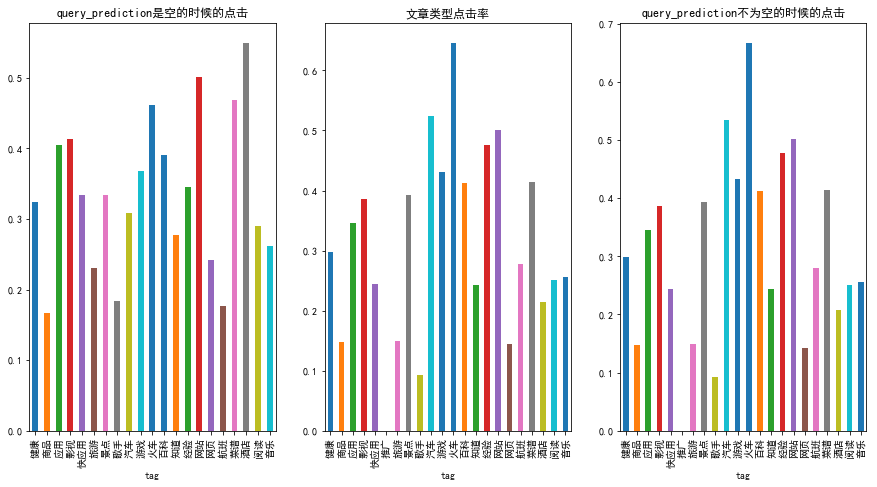

In [15]:
##query_prediction为空的时候基本满足平常时候的情况
#查找query_prediciton是空的
from matplotlib import pylab as plt 
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
none_train_data = train_data.loc[train_data['query_prediction'].isnull()]
#none_train_data['label'].mean()
not_none_train_data = train_data.loc[train_data['query_prediction'].notnull()]
plt.figure(figsize=(15,7.5))
plt.subplot(131)
none_train_data.groupby(['tag'])['label'].mean().plot.bar(title = 'query_prediction是空的时候的点击')
plt.subplot(132)
train_data.groupby(['tag'])['label'].mean().plot.bar(title = '文章类型点击率')
plt.subplot(133)
not_none_train_data.groupby(['tag'])['label'].mean().plot.bar(title = 'query_prediction不为空的时候的点击')
plt.show()

In [ ]:
#查看title不在query_prediction的时候该行的点击概率 #如果重新构建train_data_1 = train_data[train_data['query_prediciton'].notnull()].reset_index
#只统计query_prediction不为空的样本
#title不在query_prediction的远低于总体值()
count_sum = 0 #title不在query_prediction中label=1的数量
count_not_in = 0
count_in = 0
import json
def to_json(itemstr):
    if type(itemstr) != str:
        return 0
    else:
        obj = json.loads(itemstr)
        return obj
p1 = train_data['query_prediction'].map(to_json)
#print(train_data.loc[10]['title'])
#print(p1[10].has_key('10'))    python3 没有has_key()
#if train_data.loc[10]['title'] in p1[10].keys():
#   print('1')
#for inx in p1:
#    if train_data_2.loc[i]['title'] in inx.keys():
 #       print('1')
for i in range(len(train_data)):
    if type(p1[i]) != int:
        if train_data.loc[i]['title'] in p1[i].keys():
            count_in = count_in + 1
        else:
            count_not_in = count_not_in + 1
            if train_data.loc[i]['label'] == 1:
                count_sum = count_sum + 1

print("title在query_prediction中的样本数为：",count_in)
print('title不在query_prediction中的样本数为:',count_not_in)
print('title不在query_prediction中的点击率为:',count_sum/count_not_in)

In [ ]:
#增加特征，判断title是否在query_prediction里面,其中query_prediction为空的训练集默认为0
#title在query_prediction中为1，不在为0，quert_prediction为空为-1
import json
train_data['title_not_in'] = None
def to_json(itemstr):
    if type(itemstr) != str:
        return 0
    else:
        obj = json.loads(itemstr)
        return obj
p1 = train_data['query_prediction'].map(to_json)
for i in range(len(train_data['title_not_in'])):
    if type(p1[i]) == int:
        train_data.loc[i]['title_not_in'] = -1
    elif train_data.loc[i]['title'] in p1[i].keys():
        train_data.loc[i]['title_not_in'] = 1
    else:
        train_data.loc[i]['title_not_in'] = 0
print(train_data['title_not_int'].value_counts())

In [ ]:
#计算prefix和query_prediction中每个预测的相似度，取最大相似度为当前prefix和预测相似度，
#可视化相似度和点击率的关系
#---曽瑜做了


In [7]:
##################################
#计算prefix和title的相似度，即输入的前缀和显示的内容的相似度，计算相似度和点击率的关系
train_data['sml_pre_ti'] = None

import difflib
def get_equal_rate_1(str1,str2):
    return difflib.SequenceMatcher(None, str1, str2).quick_ratio()

for i in range(len(train_data)):
    if type(train_data.loc[i]['prefix'])== str and type(train_data.loc[i]['title']) == str:
        train_data.loc[i]['sml_pre_ti'] = get_equal_rate_1(train_data.loc[i]['prefix'],train_data.loc[i]['title'])
    else:
        train_data.loc[i]['sml_pre_ti'] = None

print('prefix和title的平均相似度',train_data['sml_pre_ti'].mean())


KeyboardInterrupt: 